In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
uploaded = files.upload()

Saving amer_sign2.png to amer_sign2 (1).png
Saving amer_sign3.png to amer_sign3 (1).png
Saving american_sign_language.PNG to american_sign_language (1).PNG
Saving sign_mnist_test.csv to sign_mnist_test (1).csv
Saving sign_mnist_train.csv to sign_mnist_train (1).csv


In [ ]:
data_train=pd.read_csv('sign_mnist_train.csv')
data_test=pd.read_csv('sign_mnist_test.csv')

training_images = data_train.iloc[:,1:].values #All columns except first
training_labels = data_train.iloc[:,0].values #First columns

testing_images = data_test.iloc[:,1:].values
testing_labels = data_test.iloc[:,0].values

training_images = training_images.reshape(-1,28,28,1)
testing_images = testing_images.reshape(-1,28,28,1)


print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28, 1)
(27455,)
(7172, 28, 28, 1)
(7172,)


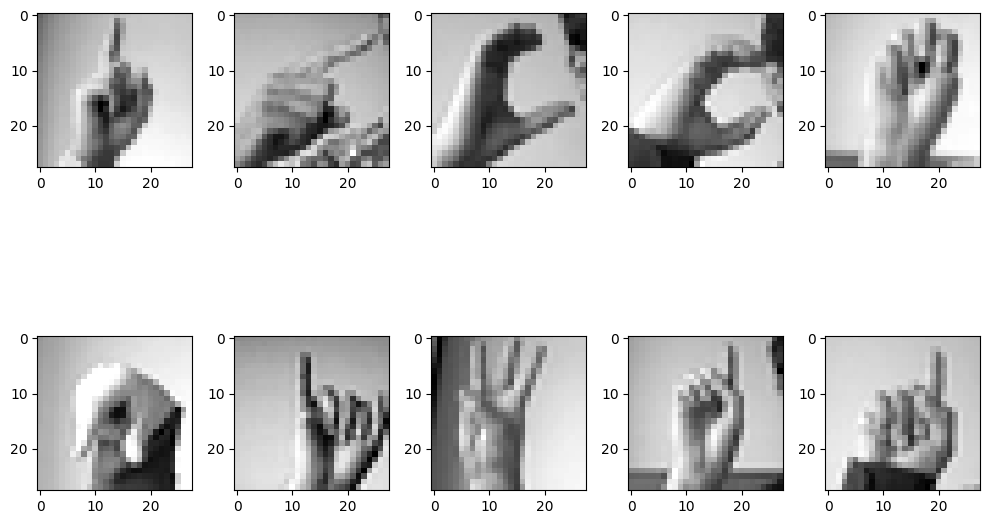

In [ ]:
# Plotting the first 10 images
fig, ax = plt.subplots(2,5) #Creates 2x5 grids for images, ax = a numpy containing individual axes(2d array)
fig.set_size_inches(10, 10)
k = 0 #variable will be used to keep track of which image from the training_images dataset is being plotted
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(training_images[k].reshape(28, 28) , cmap = "gray") #Display image
        k += 1
    plt.tight_layout()

In [ ]:
# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255, #Normalize pixel values 0-1
    rotation_range=40, #Randomly rotates image
    width_shift_range=0.2, #Randomly shifts width
    height_shift_range=0.2, #Randomly shifts height
    shear_range=0.2, #Shears image
    zoom_range=0.2, #Randomly zooms in/out
    horizontal_flip=True, #Randomly flips horizontally
    fill_mode='nearest' #Fills gaps using nearest pixels
)

validation_datagen = ImageDataGenerator(
    rescale=1 / 255 #only rescales test data
)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)), #1st conv layer, relu = (rectified linear unit) popular activation function used to introduce non linearity into the network, enables to learn complex patterns
    tf.keras.layers.MaxPooling2D(2,2), #Reduces spatial dimensions
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'), #2nd conv layer
    tf.keras.layers.MaxPooling2D(2,2), #Further reduces dimensions
    tf.keras.layers.Flatten(), #Converts 2d features to 1d
    tf.keras.layers.Dense(512, activation='relu'), #fully connected layer
    tf.keras.layers.Dense(26, activation='softmax') #output layer(26 classes), softmax converts raw output into probabilities
])

# Compile Model.
model.compile(
    optimizer='adam', #Adaptive learning rate optimizer
    loss='sparse_categorical_crossentropy', #Loss function for multi-class classification
    metrics=['accuracy'] #tract accuracy during training
)

# Train the Model
history = model.fit(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) // 32, #Batches per epoch
                              epochs=10, #1 epoch = 1 full training circle overall data
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) // 32) #Batches for validatio


model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.1136 - loss: 2.9338 - val_accuracy: 0.3737 - val_loss: 1.8402
Epoch 2/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4688 - loss: 2.1044 - val_accuracy: 0.3531 - val_loss: 1.9167
Epoch 3/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 79s 45ms/step - accuracy: 0.3655 - loss: 1.9824 - val_accuracy: 0.4820 - val_loss: 1.4521
Epoch 4/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3750 - loss: 1.7844 - val_accuracy: 0.4810 - val_loss: 1.4482
Epoch 5/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 38s 45ms/step - accuracy: 0.5038 - loss: 1.5336 - val_accuracy: 0.6917 - val_loss: 0.8920
Epoch 6/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3750 - loss: 1.6461 - val_accuracy: 0.6925 - val_loss: 0.8958
Epoch 7/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 38s 45ms/step - accuracy: 0.5847 - loss: 1.2742 - val_accuracy: 0.7513 - val_loss: 0.6827
Epoch 8/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6875 - loss: 1.0101 - val_accu

[150.06336975097656, 0.5950919985771179]

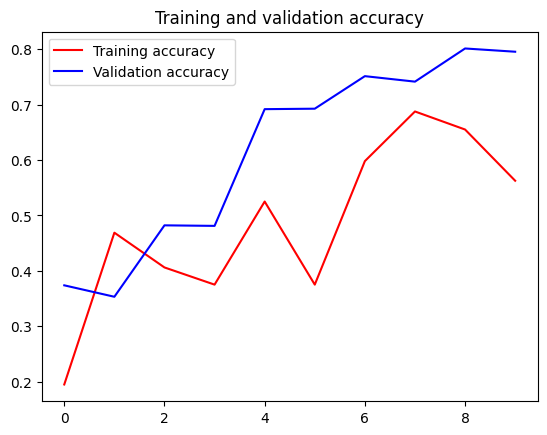

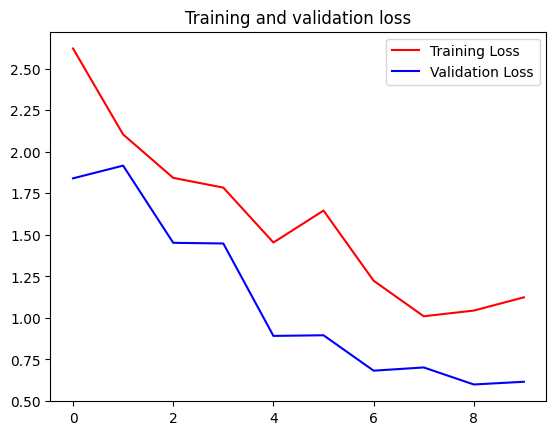

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step
              precision    recall  f1-score   support

     Class 0       0.65      0.70      0.68       331
     Class 1       1.00      0.49      0.66       432
     Class 2       0.68      0.98      0.80       310
     Class 3       0.88      0.38      0.53       245
     Class 4       0.66      0.49      0.56       498
     Class 5       0.68      0.91      0.78       247
     Class 6       0.19      0.07      0.10       348
     Class 7       0.91      0.07      0.14       436
     Class 8       0.62      0.91      0.74       288
    Class 10       0.00      0.00      0.00       331
    Class 11       0.00      0.00      0.00       209
    Class 12       0.00      0.00      0.00       394
    Class 13       0.16      0.07      0.10       291
    Class 14       0.00      0.00      0.00       246
    Class 15       0.07      0.06      0.07       347
    Class 16       0.00      0.00      0.00       164
    Class 17       0.00      0.00      

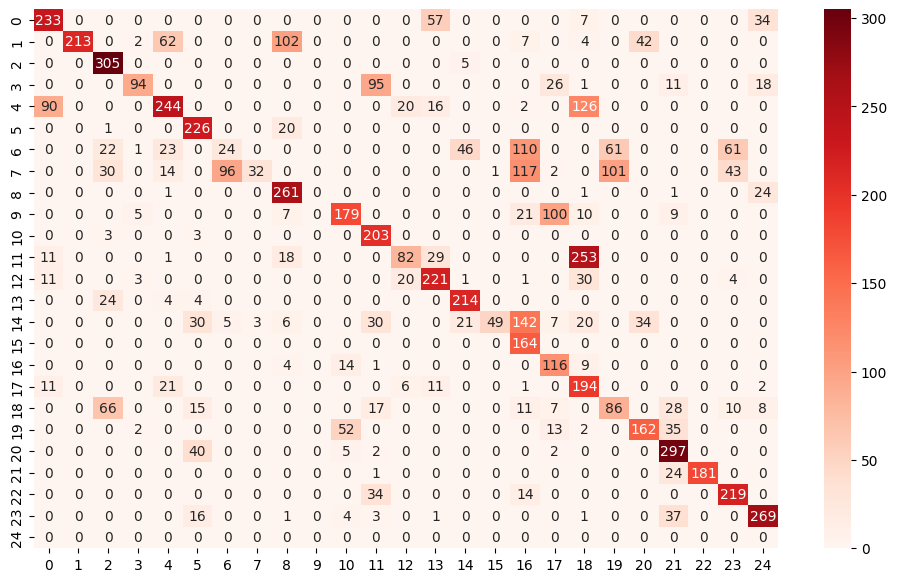

In [ ]:
predictions = np.argmax(model.predict(testing_images), axis=-1)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
predictions[:5]


# Precision, recall, f1-score for all the classes
from sklearn.metrics import classification_report, confusion_matrix

classes = ["Class " + str(i) for i in range(26) if i != 9]
print(classification_report(data_test['label'], predictions, target_names = classes))


# Confusion Matrix for the model predictions
cm = confusion_matrix(data_test['label'],predictions)

plt.figure(figsize=(12,7))
g = sns.heatmap(cm, cmap='Reds',annot=True,
           fmt='')